In [69]:
# Naive Bayes Algorithm
# 데이터를 Naive(단순)하게 '독립'적인 사건으로 가정하고
# 이 독립된 사건들을 'Bayes' 이론에 대입시켜 가장 높은 확률의 레이블로 분류하는 알고리즘
# 조건부 확률을 응용한 베이즈 공식을 사용함 -> 공통 분모를 제거하여 연산 속도 이득

# 이산적인 데이터
# - 다항 분포 나이브 베이즈 : 데이터의 특징이 출현 횟수로 나타날 때 ex) 영화 감상평 토대로 긍정/부정 리뷰 분류
# - 베르누이 나이브 베이즈 : 데이터의 특징이 0, 1로 나타날 때 ex) 스팸 메일 분류

# 이산적이지 않은 데이터
# - 가우시안 나이브 베이즈 : 연속적인 성질이 있는 특징이 있는 데이터 분류 ex) 붓꽃 데이터셋 분류

# Gaussian Bayes Algorithm

import pandas as pd
# iris 데이터셋이 sklearn 에 내장되어있음
from sklearn.datasets import load_iris
# train_set_split 을 활용하여 데이터 나눔
from sklearn.model_selection import train_test_split
# Gaussian Naive Bayes 로 iris 데이터를 분류
from sklearn.naive_bayes import GaussianNB
# 분류 성능을 측정하기 위해 metrics와 accuracy_score 임포트
from sklearn import metrics
from sklearn.metrics import accuracy_score

# iris 데이터 불러옴
dataset = load_iris()
# pandas 데이터 프레임으로 저장
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
# 분류값을 데이터 프레임에 저장
df['target'] = dataset.target
# 숫자인 분류값을 이해를 돕기위해 문자로 변경
# 붓꽃의 종류 3가지 (setosa, versicolor, virginica)
df.target = df.target.map({
    0: "setosa",
    1: "versicolor",
    2: "virginica"
})

# sepal length : 꽃받침 길이
# sepal width : 꽃받침 너비
# petal length : 꽃잎 길이
# petal width : 꽃잎 너비
# target : 붓꽃 종류

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [70]:
# 분류값 별 데이터 분포 (개수)
df.target.value_counts()

setosa        50
virginica     50
versicolor    50
Name: target, dtype: int64

In [71]:
# Iris 데이터의 분포도 확인

# 분류값 별로 데이터 프레임을 나눔
setosa_df = df[df.target == 'setosa']
versicolor_df = df[df.target == 'versicolor']
virginica_df = df[df.target == 'virginica']

<AxesSubplot:label='e80b3713-8e6c-45bd-b68d-d11fedc20994'>

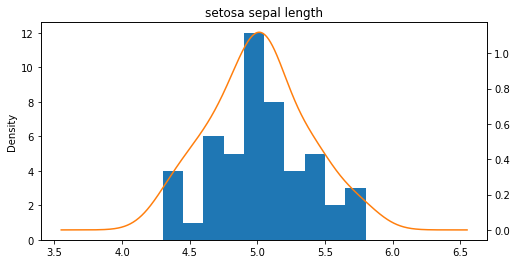

In [72]:
# Sepal Length 분포도 확인
ax = setosa_df['sepal length (cm)'].plot(kind='hist')
setosa_df['sepal length (cm)'].plot(kind='kde',
                                    ax=ax,
                                    secondary_y=True,
                                    title="setosa sepal length",
                                    figsize=(8, 4))

<AxesSubplot:label='63cc307c-cfbf-4b4a-b074-7264e95b5d51'>

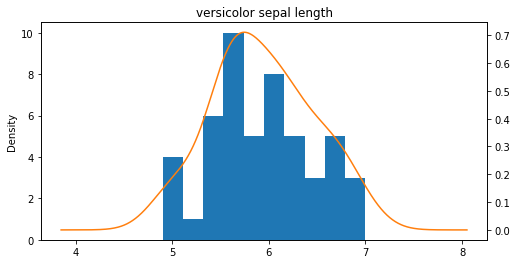

In [73]:
ax = versicolor_df['sepal length (cm)'].plot(kind='hist')
versicolor_df['sepal length (cm)'].plot(kind='kde',
                                        ax=ax,
                                        secondary_y=True,
                                        title="versicolor sepal length",
                                        figsize=(8, 4))

<AxesSubplot:label='b2df38cd-8f4c-4010-acc2-57ce8294687d'>

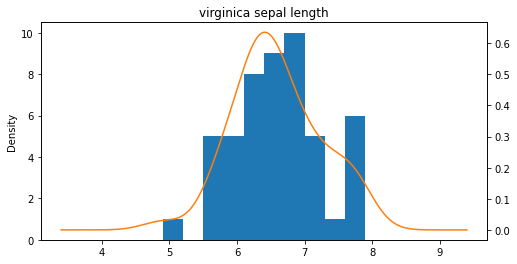

In [74]:
ax = virginica_df['sepal length (cm)'].plot(kind='hist')
virginica_df['sepal length (cm)'].plot(kind='kde',
                                        ax=ax,
                                        secondary_y=True,
                                        title="virginica sepal length",
                                        figsize=(8, 4))

<AxesSubplot:label='c2050259-c30b-4c9c-b3b1-b45a42100358'>

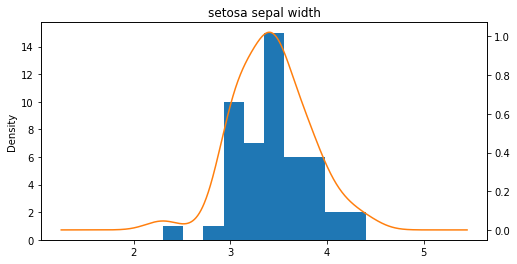

In [75]:
# Sepal width 분포도 확인
ax = setosa_df['sepal width (cm)'].plot(kind='hist')
setosa_df['sepal width (cm)'].plot(kind='kde',
                                    ax=ax,
                                    secondary_y=True,
                                    title="setosa sepal width",
                                    figsize=(8, 4))

<AxesSubplot:label='a50280f9-c917-45ed-b008-d4005975499f'>

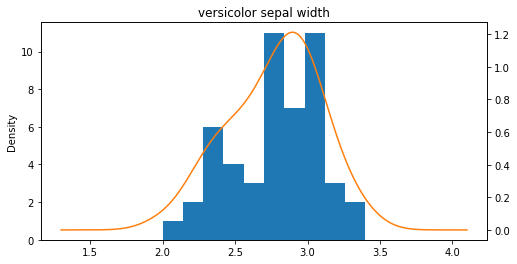

In [76]:
ax = versicolor_df['sepal width (cm)'].plot(kind='hist')
versicolor_df['sepal width (cm)'].plot(kind='kde',
                                    ax=ax,
                                    secondary_y=True,
                                    title="versicolor sepal width",
                                    figsize=(8, 4))

<AxesSubplot:label='a1f31165-7026-43fa-8509-61ebb313453f'>

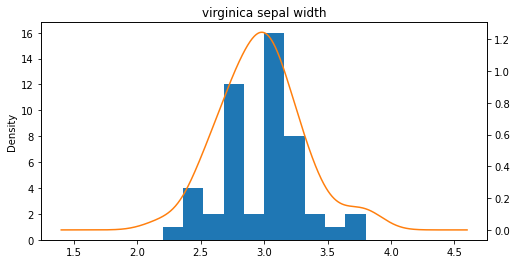

In [77]:
ax = virginica_df['sepal width (cm)'].plot(kind='hist')
virginica_df['sepal width (cm)'].plot(kind='kde',
                                    ax=ax,
                                    secondary_y=True,
                                    title="virginica sepal width",
                                    figsize=(8, 4))

<AxesSubplot:label='b29c7918-0b7c-4aba-80e2-d0534f197ac4'>

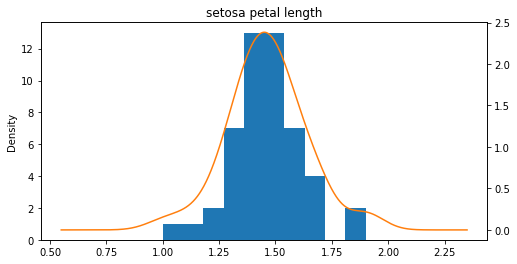

In [78]:
# Petal length 분포도 확인
ax = setosa_df['petal length (cm)'].plot(kind='hist')
setosa_df['petal length (cm)'].plot(kind='kde',
                                    ax=ax,
                                    secondary_y=True,
                                    title="setosa petal length",
                                    figsize=(8, 4))

<AxesSubplot:label='3b38d2d2-12fa-4756-b363-fda13e126335'>

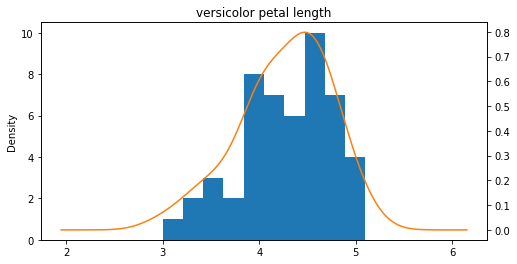

In [79]:
ax = versicolor_df['petal length (cm)'].plot(kind='hist')
versicolor_df['petal length (cm)'].plot(kind='kde',
                                    ax=ax,
                                    secondary_y=True,
                                    title="versicolor petal length",
                                    figsize=(8, 4))

<AxesSubplot:label='59d63b9c-d96c-42af-86a3-4c93b34a7fb7'>

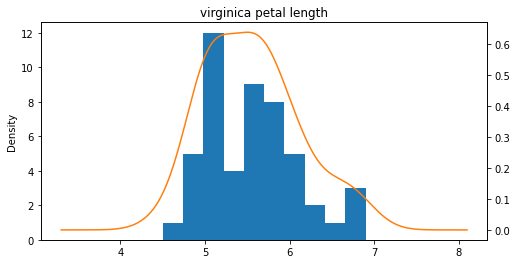

In [80]:
ax = virginica_df['petal length (cm)'].plot(kind='hist')
virginica_df['petal length (cm)'].plot(kind='kde',
                                    ax=ax,
                                    secondary_y=True,
                                    title="virginica petal length",
                                    figsize=(8, 4))

<AxesSubplot:label='ff61b675-0d0b-412d-a5e3-c814019f0c89'>

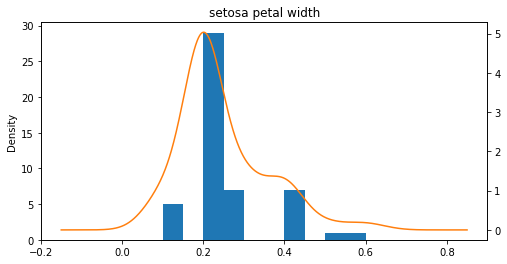

In [81]:
# Petal width 분포도 확인
ax = setosa_df['petal width (cm)'].plot(kind='hist')
setosa_df['petal width (cm)'].plot(kind='kde',
                                    ax=ax,
                                    secondary_y=True,
                                    title="setosa petal width",
                                    figsize=(8, 4))

<AxesSubplot:label='6ea5abdc-d09f-4fc4-9f14-7dc4edcd8853'>

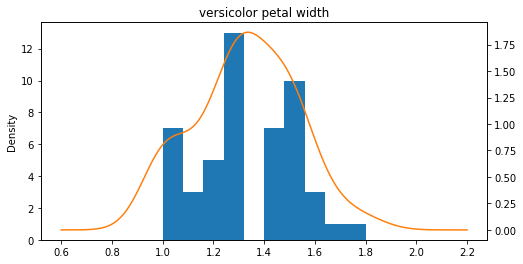

In [82]:
ax = versicolor_df['petal width (cm)'].plot(kind='hist')
versicolor_df['petal width (cm)'].plot(kind='kde',
                                    ax=ax,
                                    secondary_y=True,
                                    title="versicolor petal width",
                                    figsize=(8, 4))

<AxesSubplot:label='864c59fb-c16b-4287-98f3-73cc7e7f3c47'>

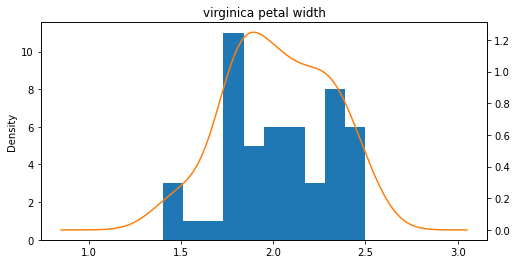

In [83]:
ax = virginica_df['petal width (cm)'].plot(kind='hist')
virginica_df['petal width (cm)'].plot(kind='kde',
                                    ax=ax,
                                    secondary_y=True,
                                    title="virginica petal width",
                                    figsize=(8, 4))

In [84]:
# 20% 를 테스트 데이터로 분류
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.2)

In [85]:
# Gaussian Naive Bayes 분류하기
model = GaussianNB()
model.fit(X_train, y_train)

# 테스트 데이터로 모델 테스트
expected = y_test
predicted = model.predict(X_test)

print(metrics.classification_report(y_test, predicted))
print("accuracy : " + str(accuracy_score(y_test, predicted)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

accuracy : 1.0


In [86]:
# Confusion Matrix (혼동 매트릭스)
print(metrics.confusion_matrix(expected, predicted))


[[13  0  0]
 [ 0  6  0]
 [ 0  0 11]]
